[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]]
[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
[72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]


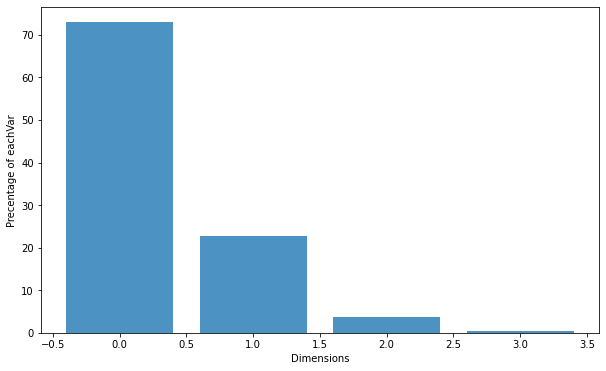

        PC1       PC2    Y
0 -2.264703 -0.480027  1.0
1 -2.080961  0.674134  1.0
2 -2.364229  0.341908  1.0
3 -2.299384  0.597395  1.0
4 -2.389842 -0.646835  1.0
5 -2.075631 -1.489178  1.0
6 -2.444029 -0.047644  1.0
7 -2.232847 -0.223148  1.0
8 -2.334640  1.115328  1.0
9 -2.184328  0.469014  1.0


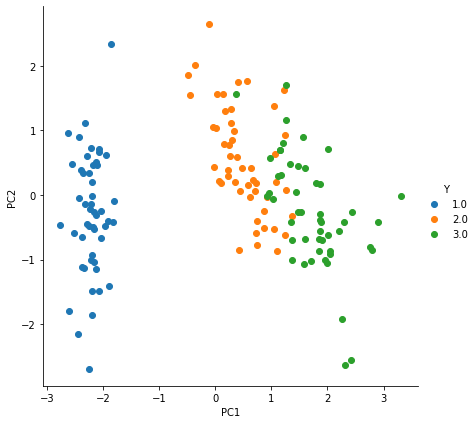

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('C:/Users/abhay/Untitled Folder/iris.csv')

X = data.values[:, 0:4]
y = data.values[:, 4]

print(X[:4, 0:3])

scaleX = StandardScaler().fit_transform(X)

# Eigen Values and Vectors
features = scaleX.T
covMatrix = np.cov(features)
values, vectors = np.linalg.eig(covMatrix)
print(values)
print(vectors)

# Variance of each feature
eachVar = []
for i in range(len(values)):
  res = values[i]/np.sum(values)*100
  eachVar.append(res)

print(eachVar)

plt.figure(figsize=(10,6))
plt.bar(range(4), eachVar, alpha=0.8)
plt.xlabel('Dimensions')
plt.ylabel('Precentage of eachVar')
plt.show()

pc1 = scaleX.dot(vectors.T[0])
pc2 = scaleX.dot(vectors.T[1])
result = pd.DataFrame(pc1, columns=["PC1"])
result["PC2"] = pc2
result["Y"] = y
print(result.head(10))

sns.FacetGrid(result, hue='Y', height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()